<a href="https://colab.research.google.com/github/violet-mj/opensourceai_20/blob/main/image_paste_to_fuckyou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-12-1 Python-3.8.15 torch-1.12.1+cu113 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 228x221 1 fuxxyou
Speed: 6.5ms pre-process, 353.3ms inference, 11.2ms NMS per image at shape (1, 3, 640, 640)


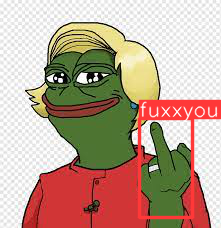

image 1/1: 228x221 1 fuxxyou
Speed: 6.5ms pre-process, 353.3ms inference, 11.2ms NMS per image at shape (1, 3, 640, 640)


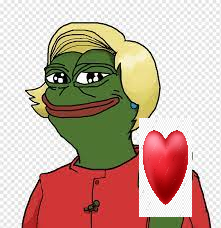

In [ ]:
import torch
import urllib.request
import cv2
from math import floor
import numpy as np
from google.colab.patches import cv2_imshow
pt = '/content/drive/MyDrive/best.pt'
# Model
# model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5l, yolov5x, etc.
model = torch.hub.load('ultralytics/yolov5', 'custom', pt)  # custom trained model


# Images path
hand_heart = '/content/heart.jpg'
im = '/content/pepef.jpg'

results = model(im)

results.print()
results.show()
results.xyxy[0]
coordinates = results.pandas().xyxy[0].values.tolist() 
print(results)
xmin, ymin, xmax, ymax, *remain = [*map(floor, coordinates[0][:-1])]
# hand_heart_response = urllib.request.urlopen(hand_heart)
# url_response = urllib.request.urlopen(im)
# img = cv2.imdecode(np.array(bytearray(url_response.read()), dtype=np.uint8), -1)
# hand_heart_img = cv2.imdecode(np.array(bytearray(hand_heart_response.read()), dtype=np.uint8), -1)
img = cv2.imread(im)
hand_heart_img = cv2.imread(hand_heart)
resize_hand_heart_img = cv2.resize(hand_heart_img, dsize=(xmax-xmin, ymax-ymin))
img[ymin:ymin+resize_hand_heart_img.shape[0], xmin:xmin+resize_hand_heart_img.shape[1]] = resize_hand_heart_img
cv2_imshow(img)


(300, 600, 3)


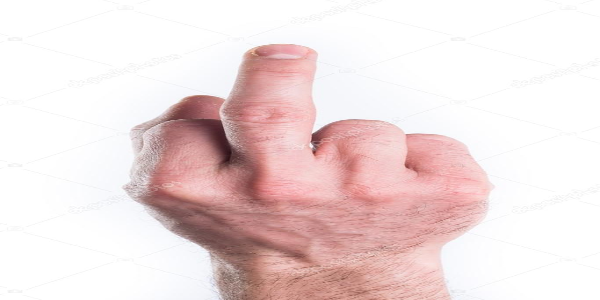

In [ ]:
dst = cv2.resize(img, dsize=(600, 300))
print(dst.shape)
cv2_imshow(dst)